# Library Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# LSTM Model Testing

350


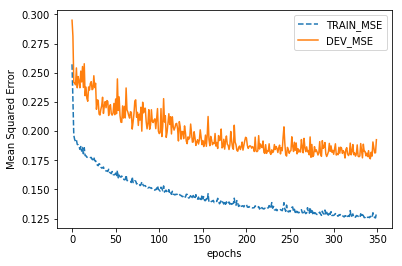

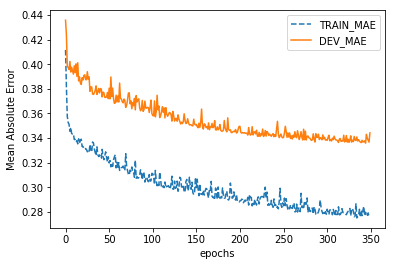

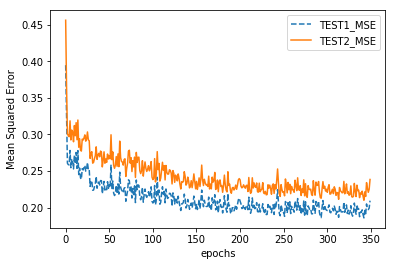

< OPT. SCORE_SUM EPOCH  247 > : -2.8194185377
opt. DEV MSE :  0.178619826455
opt. TEST1 MSE :  0.188925073761
opt. TEST2 MSE :  0.215351757131


In [3]:
Reg = False
ELBOW = 5
d = 'hybrid_LSTM'

if Reg :
    d += '_with_reg'
scores = pd.read_csv("C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/models/"+d+".csv")
mse_columns = ['TRAIN_MSE','DEV_MSE']
mae_columns = ['TRAIN_MAE','DEV_MAE']
test_columns = ['TEST1_MSE', 'TEST2_MSE']

#print(scores)

end_epoch = scores.shape[0]
print(end_epoch)
plt.plot(scores[mse_columns[0]][:end_epoch],'--')
plt.plot(scores[mse_columns[1]][:end_epoch])
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()
plt.plot(scores[mae_columns[0]][:end_epoch],'--')
plt.plot(scores[mae_columns[1]][:end_epoch])
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Absolute Error')
plt.show()
plt.close()
plt.plot(scores[test_columns[0]][:end_epoch],'--')
plt.plot(scores[test_columns[1]][:end_epoch])
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Mean Squared Error')
plt.show()
plt.close()



score_diff = (scores[mse_columns[1]]-scores[mse_columns[0]])[ELBOW:]

score_sum = (scores[mse_columns[1]]+scores[mse_columns[0]])[ELBOW:]

score_diff_norm = (score_diff - np.mean(score_diff))/np.std(score_diff)
score_sum_norm = (score_sum - np.mean(score_sum))/np.std(score_sum)
score_total = score_diff_norm + score_sum_norm
idx = np.argmin(score_total)
print('< OPT. SCORE_SUM EPOCH ',str(idx+1),'> : '+str(score_total[idx]))
print('opt. DEV MSE : ',str(scores[mse_columns[1]][idx]))
print('opt. TEST1 MSE : ',str(scores[test_columns[0]][idx]))
print('opt. TEST2 MSE : ',str(scores[test_columns[1]][idx]))

# Other Model Testing

In [35]:
dev = pd.read_csv("C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/before_arima/dev.csv")
#dev_Y = pd.read_csv("C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/dev_Y.csv")
test1 = pd.read_csv("C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/before_arima/test1.csv")
#test1_Y = pd.read_csv("C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/test1_Y.csv")
test2 = pd.read_csv("C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/before_arima/test2.csv")
#test2_Y = pd.read_csv("C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/train_dev_test/after_arima/test2_Y.csv")

dev = dev.loc[:, ~dev.columns.str.contains('^Unnamed')]
#dev_Y = dev_Y.loc[:, ~dev_Y.columns.str.contains('^Unnamed')]
test1 = test1.loc[:, ~test1.columns.str.contains('^Unnamed')]
#test1_Y = test1_Y.loc[:, ~test1_Y.columns.str.contains('^Unnamed')]
test2 = test2.loc[:, ~test2.columns.str.contains('^Unnamed')]
#test2_Y = test2_Y.loc[:, ~test2_Y.columns.str.contains('^Unnamed')]

# Historical Model

In [36]:
STEP = 20

In [37]:
dev_pred = np.array(dev['20'])
dev_y = np.array(dev['21']).reshape(1,int(1117500/STEP))[0]
test1_pred = np.array(test1['21'])
test1_y = np.array(test1['22']).reshape(1,int(1117500/STEP))[0]
test2_pred = np.array(test2['22'])
test2_y = np.array(test2['23']).reshape(1,int(1117500/STEP))[0]

dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

hist_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in hist_matrix :
    print(str(i[0]) + '/' + str(i[1]))

0.459729626745/0.54492569017
0.500474375728/0.574133862615
0.445800739647/0.534481179475


# Constant Correlation Model

In [38]:
pred = sum(dev['20'])/int(1117500/STEP)
dev_pred = np.array([pred] * int(1117500/STEP))
pred = sum(test1['21'])/int(1117500/STEP)
test1_pred = np.array([pred] * int(1117500/STEP))
pred = sum(test2['22'])/int(1117500/STEP)
test2_pred = np.array([pred] * int(1117500/STEP))

dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

cc_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in cc_matrix :
    print(str(i[0]) + '/' + str(i[1]))

0.295445251397/0.442321381012
0.263904487183/0.443618996923
0.290317094717/0.457613454021


# Multi Group Model

In [13]:
data_df = pd.read_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/dataset.csv')
data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]
num_list = []
for i in range(24):
    num_list.append(str(i))
data_df = data_df[num_list].copy()
data_df = np.transpose(data_df)

In [14]:
data = pd.read_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/SP500_list.csv')
print(data['GICS_sector'].unique())
print(data.head())

['Industrials' 'Health Care' 'Information Technology'
 'Consumer Discretionary' 'Utilities' 'Financials' 'Materials'
 'Real Estate' 'Consumer Staples' 'Energy' 'Telecommunication Services']
   Unnamed: 0             GICS_sector               GICS_sub_industry  \
0           0             Industrials        Industrial Conglomerates   
1           1             Health Care           Health Care Equipment   
2           2             Health Care                 Pharmaceuticals   
3           3  Information Technology  IT Consulting & Other Services   
4           4  Information Technology     Home Entertainment Software   

               company ticker  
0           3M Company    MMM  
1  Abbott Laboratories    ABT  
2          AbbVie Inc.   ABBV  
3        Accenture plc    ACN  
4  Activision Blizzard   ATVI  


In [15]:
# portfolio list
portfolio = ['CELG', 'PXD', 'WAT', 'LH', 'AMGN', 'AOS', 'EFX', 'CRM', 'NEM', 'JNPR', 'LB', 'CTAS', 'MAT', 'MDLZ', 'VLO', 'APH', 'ADM', 'MLM', 'BK', 'NOV', 'BDX', 'RRC', 'IVZ', 'ED', 'SBUX', 'GRMN', 'CI', 'ZION', 'COO', 'TIF', 'RHT', 'FDX', 'LLL', 'GLW', 'GPN', 'IPGP', 'GPC', 'HPQ', 'ADI', 'AMG', 'MTB', 'YUM', 'SYK', 'KMX', 'AME', 'AAP', 'DAL', 'A', 'MON', 'BRK', 'BMY', 'KMB', 'JPM', 'CCI', 'AET', 'DLTR', 'MGM', 'FL', 'HD', 'CLX', 'OKE', 'UPS', 'WMB', 'IFF', 'CMS', 'ARNC', 'VIAB', 'MMC', 'REG', 'ES', 'ITW', 'NDAQ', 'AIZ', 'VRTX', 'CTL', 'QCOM', 'MSI', 'NKTR', 'AMAT', 'BWA', 'ESRX', 'TXT', 'EXR', 'VNO', 'BBT', 'WDC', 'UAL', 'PVH', 'NOC', 'PCAR', 'NSC', 'UAA', 'FFIV', 'PHM', 'LUV', 'HUM', 'SPG', 'SJM', 'ABT', 'CMG', 'ALK', 'ULTA', 'TMK', 'TAP', 'SCG', 'CAT', 'TMO', 'AES', 'MRK', 'RMD', 'MKC', 'WU', 'ACN', 'HIG', 'TEL', 'DE', 'ATVI', 'O', 'UNM', 'VMC', 'ETFC', 'CMA', 'NRG', 'RHI', 'RE', 'FMC', 'MU', 'CB', 'LNT', 'GE', 'CBS', 'ALGN', 'SNA', 'LLY', 'LEN', 'MAA', 'OMC', 'F', 'APA', 'CDNS', 'SLG', 'HP', 'XLNX', 'SHW', 'AFL', 'STT', 'PAYX', 'AIG', 'FOX', 'MA']

In [16]:
pf_sector_item = {'Industrials':[],
                  'Health Care':[],
                  'Information Technology':[],
                  'Consumer Discretionary':[],
                  'Utilities':[],
                  'Financials' :[],
                  'Materials':[],
                  'Real Estate':[],
                  'Consumer Staples':[],
                  'Energy':[],
                  'Telecommunication Services':[]}
for item in portfolio :
    pf_sector_item[data[data.ticker == item]['GICS_sector'].values[0]] = pf_sector_item[data[data.ticker == item]['GICS_sector'].values[0]]+[item]
print(pf_sector_item)


{'Industrials': ['AOS', 'EFX', 'CTAS', 'FDX', 'LLL', 'AME', 'DAL', 'UPS', 'ARNC', 'ITW', 'TXT', 'UAL', 'NOC', 'PCAR', 'NSC', 'LUV', 'ALK', 'CAT', 'DE', 'RHI', 'GE'], 'Health Care': ['CELG', 'WAT', 'LH', 'AMGN', 'BDX', 'CI', 'COO', 'SYK', 'A', 'BMY', 'AET', 'VRTX', 'NKTR', 'ESRX', 'HUM', 'ABT', 'TMO', 'MRK', 'RMD', 'ALGN', 'LLY'], 'Information Technology': ['CRM', 'JNPR', 'APH', 'RHT', 'GLW', 'GPN', 'IPGP', 'HPQ', 'ADI', 'QCOM', 'MSI', 'AMAT', 'WDC', 'FFIV', 'WU', 'ACN', 'TEL', 'ATVI', 'MU', 'CDNS', 'XLNX', 'PAYX', 'MA'], 'Consumer Discretionary': ['LB', 'MAT', 'SBUX', 'GRMN', 'TIF', 'GPC', 'YUM', 'KMX', 'AAP', 'DLTR', 'MGM', 'FL', 'HD', 'VIAB', 'BWA', 'PVH', 'UAA', 'PHM', 'CMG', 'ULTA', 'CBS', 'SNA', 'LEN', 'OMC', 'F', 'FOX'], 'Utilities': ['ED', 'CMS', 'ES', 'SCG', 'AES', 'NRG', 'LNT'], 'Financials': ['BK', 'IVZ', 'ZION', 'AMG', 'MTB', 'BRK', 'JPM', 'MMC', 'NDAQ', 'AIZ', 'BBT', 'TMK', 'HIG', 'UNM', 'ETFC', 'CMA', 'RE', 'CB', 'AFL', 'STT', 'AIG'], 'Materials': ['NEM', 'MLM', 'MON', 'IF

In [17]:
market_data = pd.read_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/stock08_price.csv')
pf_sector_dev = {}
pf_sector_test1 = {}
pf_sector_test2 = {}

for i in range(150):
    for j in range(149-i):
        a = portfolio[i]
        b = portfolio[149-j]
        a_price = market_data[a]
        b_price = market_data[b]
        a_sector = data[data.ticker == a]['GICS_sector'].values[0]
        b_sector = data[data.ticker == b]['GICS_sector'].values[0]
        sector_pair = max(a_sector, b_sector)+'_'+min(a_sector, b_sector)
        
        dev = []
        test1 = []
        test2 = []
        for k in range(5):
            dev_start = 2000 + k*20
            test1_start = 2100 + k*20
            test2_start = 2200 + k*20
            dev.append(a_price[dev_start:dev_start+100].corr(b_price[dev_start:dev_start+100]))
            test1.append(a_price[test1_start:test1_start+100].corr(b_price[test1_start:test1_start+100]))
            test2.append(a_price[test2_start:test2_start+100].corr(b_price[test2_start:test2_start+100]))
        
        try:
            pf_sector_dev[sector_pair] = pf_sector_dev[sector_pair] + [dev]
        except KeyError :
            pf_sector_dev[sector_pair] = [dev]
            
        try:
            pf_sector_test1[sector_pair] = pf_sector_test1[sector_pair] + [test1]
        except KeyError :
            pf_sector_test1[sector_pair] = [test1]
            
        try:
            pf_sector_test2[sector_pair] = pf_sector_test2[sector_pair] + [test2]
        except KeyError :
            pf_sector_test2[sector_pair] = [test2]

In [18]:
pairs = [key for key in pf_sector_dev]
sector_pair_corr_dev = {}
sector_pair_corr_test1 = {}
sector_pair_corr_test2 = {}
for pair in pairs :
    dev_zeroes = np.array([0] * 5)
    test1_zeroes = np.array([0] * 5)
    test2_zeroes = np.array([0] * 5)
    dev_length = len(pf_sector_dev[pair])
    test1_length = len(pf_sector_test1[pair])
    test2_length = len(pf_sector_test2[pair])
    for arr in pf_sector_dev[pair] :
        dev_zeroes = dev_zeroes + np.array(arr)
        dev_result = dev_zeroes/dev_length
    for arr in pf_sector_test1[pair] :
        test1_zeroes = test1_zeroes + np.array(arr)
        test1_result = test1_zeroes/test1_length
    for arr in pf_sector_test2[pair] :
        test2_zeroes = test2_zeroes + np.array(arr)
        test2_result = test2_zeroes/test2_length
    sector_pair_corr_dev[pair] = dev_result
    sector_pair_corr_test1[pair] = test1_result
    sector_pair_corr_test2[pair] = test2_result

In [19]:
num_list = [STEP*i for i in range(int(1117500/STEP))]
dataset = pd.read_csv("C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/dataset.csv")
dev_y = dataset['21'].copy()
test1_y = dataset['22'].copy()
test2_y = dataset['23'].copy()

dev_y = np.array(dev_y[num_list]).reshape(1,int(1117500/STEP))[0]
test1_y = np.array(test1_y[num_list]).reshape(1,int(1117500/STEP))[0]
test2_y = np.array(test2_y[num_list]).reshape(1,int(1117500/STEP))[0]

dev_pred = []
test1_pred = []
test2_pred = []
for i in range(150):
    for j in range(149-i):
        a = portfolio[i]
        b = portfolio[149-j]
        a_sector = data[data.ticker == a]['GICS_sector'].values[0]
        b_sector = data[data.ticker == b]['GICS_sector'].values[0]
        sector_pair = max(a_sector, b_sector)+'_'+min(a_sector, b_sector)
        
        dev_pred = dev_pred + list(sector_pair_corr_dev[sector_pair])
        test1_pred = test1_pred + list(sector_pair_corr_test1[sector_pair])
        test2_pred = test2_pred + list(sector_pair_corr_test2[sector_pair])
dev_pred = np.array(dev_pred)
test1_pred = np.array(test1_pred)
test2_pred = np.array(test2_pred)


dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

mg_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in mg_matrix :
    print(str(i[0]) + '/' + str(i[1]))

0.307930389914/0.451498858397
0.291014800661/0.455505188547
0.287446079292/0.447963398344


# Single Index Model

In [20]:
data_df = pd.read_csv('C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/stock08_price.csv')
data_df = data_df.loc[:, ~data_df.columns.str.contains('^Unnamed')]


In [21]:
dev_pred = []
test1_pred = []
test2_pred = []

for i in range(150):
    for j in range(149-i):
        a = portfolio[i]
        b = portfolio[149-j]
        for k in range(5):
            dev_start = 2000 + k*20
            test1_start = 2100 + k*20
            test2_start = 2200 + k*20
            dev_pred.append(data_df[a][dev_start:dev_start+100].corr(data_df['SP500'][dev_start:dev_start+100]) *
                            data_df[b][dev_start:dev_start+100].corr(data_df['SP500'][dev_start:dev_start+100]))
            test1_pred.append(data_df[a][test1_start:test1_start+100].corr(data_df['SP500'][test1_start:test1_start+100])*
                              data_df[b][test1_start:test1_start+100].corr(data_df['SP500'][test1_start:test1_start+100]))
            test2_pred.append(data_df[a][test2_start:test2_start+100].corr(data_df['SP500'][test2_start:test2_start+100])*
                              data_df[b][test2_start:test2_start+100].corr(data_df['SP500'][test2_start:test2_start+100]))
dev_pred = np.array(dev_pred)
test1_pred = np.array(test1_pred)
test2_pred = np.array(test2_pred)
            
num_list = [STEP*i for i in range(int(1117500/STEP))]
dataset = pd.read_csv("C:/Users/Froilan/Desktop/myFiles/JupyterFiles/stock_correlation_prediction/dataset.csv")
dev_y = dataset['21'].copy()
test1_y = dataset['22'].copy()
test2_y = dataset['23'].copy()

dev_y = np.array(dev_y[num_list]).reshape(1,int(1117500/STEP))[0]
test1_y = np.array(test1_y[num_list]).reshape(1,int(1117500/STEP))[0]
test2_y = np.array(test2_y[num_list]).reshape(1,int(1117500/STEP))[0]

  

dev_mse = sum((dev_pred-dev_y)**2)/len(dev_pred)
dev_mae = sum(abs(dev_pred-dev_y))/len(dev_pred)
test1_mse = sum((test1_pred-test1_y)**2)/len(test1_pred)
test1_mae = sum(abs(test1_pred-test1_y))/len(test1_pred)
test2_mse = sum((test2_pred-test2_y)**2)/len(test2_pred)
test2_mae = sum(abs(test2_pred-test2_y))/len(test2_pred)

mg_matrix = [[dev_mse, dev_mae], [test1_mse, test1_mae], [test2_mse, test2_mae]]
for i in mg_matrix :
    print(str(i[0]) + '/' + str(i[1]))                  

0.403468057827/0.51653447995
0.351679806968/0.492034991305
0.385985603724/0.50089471591
